In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

from statsmodels.sandbox.stats.runs import runstest_1samp
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import acf


In [2]:
# Loading a CSV file into a DataFrame
df_void = pd.read_csv('../Processed dataset/df_voids.csv')
df_parts = pd.read_csv('../Processed dataset/df_parts.csv')
df_void_new = pd.read_csv('../Processed dataset/df_new_voids.csv')
df_parts_new = pd.read_csv('../Processed dataset/df_new_parts.csv')

#df_parts.head(10)
df_void.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,void,1,94,37.556,0.773,1.445,0.949,0.696,14.463,9.178,10.940,0,41
1,img01.bmp,top_left,void,2,95,46.142,0.935,-1.466,0.872,0.565,19.647,6.959,10.998,0,41
2,img01.bmp,top_left,void,3,239,77.527,0.942,-1.432,0.909,0.569,31.984,10.699,17.444,0,41
3,img01.bmp,top_left,void,4,195,61.420,0.885,1.545,0.907,0.577,24.535,11.419,15.757,0,41
4,img01.bmp,top_left,void,5,146,54.770,0.883,0.818,0.912,0.477,20.885,9.814,13.634,0,41
5,img01.bmp,top_left,void,6,192,71.835,0.954,-1.440,0.881,0.529,30.397,9.124,15.635,0,41
6,img01.bmp,top_left,void,7,322,72.770,0.324,0.429,0.947,0.610,22.009,20.826,20.248,0,41
7,img01.bmp,top_left,void,8,342,76.184,0.498,0.893,0.927,0.594,23.752,20.593,20.867,0,41
8,img01.bmp,top_left,void,9,292,78.912,0.904,-0.973,0.927,0.438,31.198,13.312,19.282,0,41
9,img01.bmp,top_left,void,10,306,75.527,0.731,0.131,0.916,0.567,25.444,17.365,19.739,0,41


In [3]:
df_void_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,void,1,104,40.142,0.752,-1.556,0.912,0.693,14.874,9.809,11.507,0,41
1,img01.bmp,top_left,void,2,106,47.799,0.935,-1.335,0.898,0.589,20.548,7.293,11.617,0,41
2,img01.bmp,top_left,void,3,263,80.355,0.939,-1.307,0.895,0.501,32.887,11.318,18.299,0,41
3,img01.bmp,top_left,void,4,211,64.006,0.884,-1.478,0.887,0.601,25.354,11.839,16.391,0,41
4,img01.bmp,top_left,void,5,159,56.355,0.874,0.932,0.888,0.523,21.442,10.408,14.228,0,41
5,img01.bmp,top_left,void,6,211,73.077,0.951,-1.313,0.847,0.471,31.267,9.708,16.391,0,41
6,img01.bmp,top_left,void,7,339,75.841,0.326,0.692,0.929,0.589,22.505,21.278,20.776,0,41
7,img01.bmp,top_left,void,8,361,78.184,0.502,1.001,0.928,0.602,24.343,21.051,21.439,0,41
8,img01.bmp,top_left,void,9,329,77.770,0.718,0.249,0.901,0.580,26.044,18.126,20.467,0,41
9,img01.bmp,top_left,void,10,311,82.083,0.900,-0.839,0.899,0.461,31.733,13.860,19.899,0,41


In [4]:
df_parts.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,part,0,39334,3979.892,0.145,-1.399,0.775,0.658,276.941,274.023,223.789,0,41
1,img01.bmp,bottom_left,part,0,38974,4087.348,0.148,-1.234,0.767,0.721,278.216,275.169,222.763,1,42
2,img01.bmp,top_right,part,0,39176,3988.051,0.163,1.528,0.780,0.712,275.773,272.072,223.339,2,46
3,img01.bmp,bottom_right,part,0,38904,4011.739,0.161,-1.186,0.772,0.670,276.860,273.250,222.563,3,47
4,img02.bmp,top_left,part,0,38376,4133.306,0.119,-0.789,0.755,0.707,278.803,276.832,221.047,4,42
5,img02.bmp,bottom_left,part,0,38086,4233.674,0.104,-0.863,0.750,0.729,279.073,277.567,220.210,5,42
6,img02.bmp,top_right,part,0,37905,4290.058,0.052,-0.869,0.752,0.723,277.310,276.929,219.686,6,47
7,img02.bmp,bottom_right,part,0,38740,4084.335,0.128,-0.828,0.764,0.720,277.947,275.666,222.093,7,44
8,img03.bmp,top_left,part,0,39202,4034.821,0.125,-1.325,0.774,0.722,276.453,274.286,223.413,8,43
9,img03.bmp,bottom_left,part,0,39079,4049.892,0.135,-1.164,0.771,0.714,277.074,274.527,223.063,9,43


In [5]:
df_parts_new.head(10)

,Image name,Position,Region type,ID,Area [pixels],Perimeter [pixels],Eccentricity,Orientation [radians],Solidity,Extent,Major Axis Length [pixels],Minor Axis Length [pixels],Equivalent Diameter [pixels],Part_ID,Num_voids
0,img01.bmp,top_left,part,0,38291,4105.674,0.153,-1.268,0.760,0.743,277.925,274.667,220.802,0,41
1,img01.bmp,bottom_left,part,0,37887,4155.306,0.157,-1.304,0.752,0.735,279.026,275.584,219.634,1,42
2,img01.bmp,top_right,part,0,37334,4106.076,0.189,1.564,0.752,0.734,277.777,272.791,218.026,2,46
3,img01.bmp,bottom_right,part,0,37868,4139.319,0.164,-1.070,0.756,0.738,277.900,274.158,219.579,3,45
4,img02.bmp,top_left,part,0,36599,4223.005,0.118,-0.817,0.730,0.713,280.140,278.182,215.869,4,41
5,img02.bmp,bottom_left,part,0,36382,4305.088,0.104,-0.787,0.722,0.706,280.715,279.187,215.228,5,42
6,img02.bmp,top_right,part,0,36808,4366.544,0.067,-1.190,0.737,0.721,278.233,277.617,216.484,6,47
7,img02.bmp,bottom_right,part,0,36903,4180.034,0.127,-0.903,0.738,0.723,279.169,276.892,216.763,7,43
8,img03.bmp,top_left,part,0,37697,4124.720,0.123,-1.276,0.753,0.735,277.368,275.259,219.083,8,43
9,img03.bmp,bottom_left,part,0,37626,4153.833,0.117,-0.853,0.751,0.733,277.820,275.897,218.876,9,43


In [6]:
df_parts['Part_ID'] # 40 different images

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
Name: Part_ID, dtype: int64

### Analisi df_parts e df_parts_new

Vedo quante parti vuote cambiano

In [40]:
df_void_new.loc[df_void_new['Part_ID'] == 39].shape

(47, 15)

In [37]:
df_void.loc[df_void['Part_ID'] == 39].shape

(47, 15)

In [35]:
print(df_parts_new['Num_voids'].values - df_parts['Num_voids'].values)  # .values è necessario se no sottrazione viene fatta a parità di indici

0     0
1     0
2     0
3    -2
4    -1
5     0
6     0
7    -1
8     0
9     0
10    0
11    0
12    0
13   -2
14    0
15    0
16    0
17    0
18    0
19   -1
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28   -1
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
Name: Num_voids, dtype: int64


In [176]:
# normality test for df_parts

start_index = 4

end_index = len(df_void.columns) 

for col in df_parts.columns[start_index:end_index]:
    dataset = df_parts.loc[:, col].values 

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.952
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.634
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.096
p-value of the Shapiro-Wilk test for "Extent": 0.004
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.223
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.204
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.954
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002


In [177]:
# normality test for df parts new
start_index = 4

end_index = len(df_void.columns) 

for col in df_parts.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values 

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.731
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.869
p-value of the Shapiro-Wilk test for "Eccentricity": 0.097
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.267
p-value of the Shapiro-Wilk test for "Extent": 0.369
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.097
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.317
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.704
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002


Per alcune features ho normalità ma bootstrap t -intervals vanno bene in ogni caso...  
 classici CI potrebbero essere più precisi, da provare...  
 
Test: H0: df_parts = df_parts_new

https://acclab.github.io/bootstrap-confidence-intervals.html   
https://www2.stat.duke.edu/~banks/111-lectures.dir/lect13.pdf

In [97]:
# Bootstrap t-intervals per Num voids
import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_void.columns) 



for col in df_parts.columns[start_index:end_index]:
    dataset1 = df_parts_new.loc[:, col].values # STAI RIMUOVENDO DATI 
    dataset2 = df_parts.loc[:, col].values

    dimD1 = dataset1.shape[0]
    dimD2 = dataset2.shape[0]
    min_dim = min(dimD1, dimD2)
    dataset1 = dataset1[:min_dim]
    dataset2 = dataset2[:min_dim]
    dataset = dataset1 - dataset2

    mu_hat = np.mean(dataset)
    sigma_hat = np.std(dataset)

    np.random.seed(42)
    t_boot = np.zeros(B)
    for b in range(B):
        x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
        mu_boot = np.mean(x_boot)
        sigma_boot = np.std(x_boot)
    
        t_boot[b] = (mu_boot - mu_hat) / sigma_boot

    ALPHA = 0.05
    q_low = np.percentile(t_boot, ALPHA/2 * 100)
    q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
    CI = {
        'Lower CI': mu_hat - q_up * sigma_hat,
        'Point Estimate': mu_hat,
        'Upper CI': mu_hat - q_low * sigma_hat
    }

    if (CI['Upper CI'] * CI['Lower CI'] > 0 ): # 0 not included 
        print(f"ATTENZIONE: L'intervallo di confidenza per la colonna {col} non contiene zero!")

    results.append([f"{col}", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))


ATTENZIONE: L'intervallo di confidenza per la colonna Area [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Perimeter [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Solidity non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Extent non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Major Axis Length [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Minor Axis Length [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Equivalent Diameter [pixels] non contiene zero!
ATTENZIONE: L'intervallo di confidenza per la colonna Num_voids non contiene zero!
+------------------------------+----------------+------------------+----------------+
| Column                       |       Lower CI |   Point Estimate |       Upper CI |
+==============================+================+==================+================+
| Area [pixels] 

c:\Users\feder\anaconda3\envs\qda\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


### Analisi df_void e df_new_void  
Studio diviso per immagini  
Test: H0: df_void = df_void_new a parità di immagini


In [172]:
 # normality test df void for img = 
start_index = 4

end_index = len(df_void.columns) - 2

img = 0

for col in df_void.columns[start_index:end_index]:
    dataset = df_void.loc[df_void['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.265
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.220
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.001
p-value of the Shapiro-Wilk test for "Solidity": 0.000
p-value of the Shapiro-Wilk test for "Extent": 0.005
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.792
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.089
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.383


In [173]:
# normality test df_void_new for img = 
start_index = 4

end_index = len(df_void.columns) - 2

img = 0

for col in df_void.columns[start_index:end_index]:
    dataset = df_void_new.loc[df_void_new['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.290
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.322
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.001
p-value of the Shapiro-Wilk test for "Solidity": 0.010
p-value of the Shapiro-Wilk test for "Extent": 0.027
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.795
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.090
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.351


In alcuni casi ho normalità, ma per avere risualto più immediato faccio solo boostrap t-intervals

In [98]:
import numpy as np
# pip install tabulate
from tabulate import tabulate

B = int(1e3)
results = []

start_index = 4

end_index = len(df_void.columns) - 2

diff = np.zeros(39)

import numpy as np
from tabulate import tabulate

# Definisci il range di immagini da 0 a 39
for img in range(40):

    # Itera sulle colonne del dataframe
    for col in df_void.columns[start_index:end_index]:
        dataset1 = df_void_new.loc[df_void_new['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
                                                                               # Io direi di sì ( test sulla media!! ) + STAI RIMUOVENDO DATI
        dataset2 = df_void.loc[df_void['Part_ID'] == img, col].values
        dimD1 = dataset1.shape[0]  # Assume che il numero di righe sia la dimensione rilevante
        dimD2 = dataset2.shape[0]
        min_dim = min(dimD1, dimD2)
        dataset1 = dataset1[:min_dim]
        dataset2 = dataset2[:min_dim]
        dataset = dataset1 - dataset2

        mu_hat = np.mean(dataset)
        sigma_hat = np.std(dataset)

        np.random.seed(42)
        t_boot = np.zeros(B)
        
        # Esegui il bootstrap
        for b in range(B):
            x_boot = np.random.choice(dataset, replace=True, size=len(dataset))
            mu_boot = np.mean(x_boot)
            sigma_boot = np.std(x_boot)
    
            t_boot[b] = (mu_boot - mu_hat) / sigma_boot

        ALPHA = 0.05
        q_low = np.percentile(t_boot, ALPHA/2 * 100)
        q_up = np.percentile(t_boot, (1 - ALPHA/2) * 100)
        CI = {
            'Lower CI': mu_hat - q_up * sigma_hat,
            'Point Estimate': mu_hat,
            'Upper CI': mu_hat - q_low * sigma_hat
        }

        if (CI['Upper CI'] * CI['Lower CI'] > 0 ): # 0 not included 
            print(f"ATTENZIONE: L'intervallo di confidenza per la colonna {col} non contiene zero!")
            diff[img] = 1 

        results.append([f"{col}\n(Part_ID = {img})", CI['Lower CI'], CI['Point Estimate'], CI['Upper CI']])

    print(tabulate(results, headers=['Column', 'Lower CI', 'Point Estimate', 'Upper CI'], tablefmt='grid'))


ATTENZIONE: L'intervallo di confidenza per la colonna Solidity non contiene zero!
+------------------------------+-------------+------------------+-------------+
| Column                       |    Lower CI |   Point Estimate |    Upper CI |
+==============================+=============+==================+=============+
| Area [pixels]                | -27.3227    |      18.8049     | 63.3162     |
| (Part_ID = 0)                |             |                  |             |
+------------------------------+-------------+------------------+-------------+
| Perimeter [pixels]           |  -3.93578   |       3.15383    |  9.72439    |
| (Part_ID = 0)                |             |                  |             |
+------------------------------+-------------+------------------+-------------+
| Eccentricity                 |  -0.0363188 |      -0.00497561 |  0.0276549  |
| (Part_ID = 0)                |             |                  |             |
+------------------------------+------

In [94]:
diff
# queste immagini hanno valori diversi in almeno una colonna 

# esegui codice solo per questi indici per indagare sulle differenze

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0.])

### Commenti 

I numeri di vuoti cambiano significativamente tra i due dataset.   
Le misurazioni per le parti dipende.  
Al contrario ( se gli intevalli bootstrap sono ok) le misurazioni dei vuoti non dovrebbero avere differenze significative a parità di immagini.   

Quale dataset scegliamo? Forse direi il secondo perchè le misurazioni derivano da un'immagine " più precisa"



Una volta scelto il dataset  

Osservazioni:  
Da df_parts:
- Num_void sembra indicativo --> un oggetto che non ha un numero di vuoti entro un certo intervallo potrebbe essere difettoso  

Da df_void:  

- Come variabile aggiuntiva si potrebbe calcolare quanto spazio vuoto caraterrizza un'immmagine ( in termini di area e perimetro).  
- Inoltre a parità di ugual rotazione dell'immagine ogni void dovrebbe avere la stessa rotazione, perimetro e area ( ovvero void1 di immagine 1 = void1 di immagine 2 = ...)  
(NB: in teoria tutte le features dovrebbero essere uguali, si può fare un controllo su tutte e tenere quelle che hanno distrbuzione normale)




### Normality in df_parts_new

In [164]:
start_index = 4

end_index = len(df_void.columns) 

for col in df_parts.columns[start_index:end_index]:
    dataset = df_parts_new.loc[:, col].values
    dataset = dataset [~np.isnan(dataset )]

    
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

# Area, Perimeter, Eccentricity, Solidity, Extent, Minor Axis Length, Equivalent Diameter have gaussian distribution !!!


p-value of the Shapiro-Wilk test for "Area [pixels]": 0.731
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.869
p-value of the Shapiro-Wilk test for "Eccentricity": 0.097
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.000
p-value of the Shapiro-Wilk test for "Solidity": 0.267
p-value of the Shapiro-Wilk test for "Extent": 0.369
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.097
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.317
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.704
p-value of the Shapiro-Wilk test for "Part_ID": 0.124
p-value of the Shapiro-Wilk test for "Num_voids": 0.002


### Analisi Num voids

p-value of the Shapiro-Wilk test for "Num_voids": 0.002
Lambda = -2.618


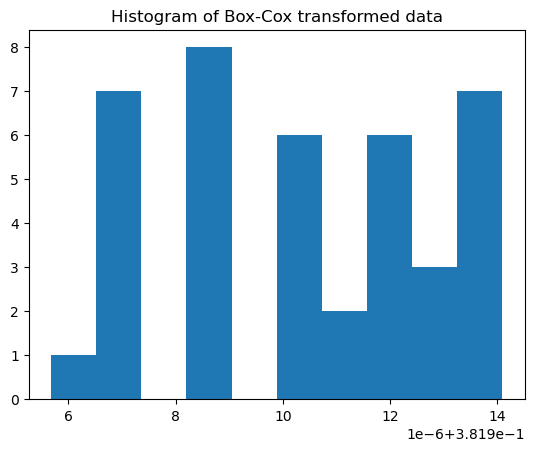

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.003


In [108]:
df_parts_new['Num_voids']

col = 'Num_voids'
# Verify the normality of the data
# Shapiro-Wilk test
_, p_value_SW = stats.shapiro(df_parts_new['Num_voids'])
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) # no normality


## Box cox trasformation 

[Num_voids_norm, lmbda] = stats.boxcox(df_parts_new['Num_voids'])
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

print('Lambda = %.3f' % lmbda)

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) 



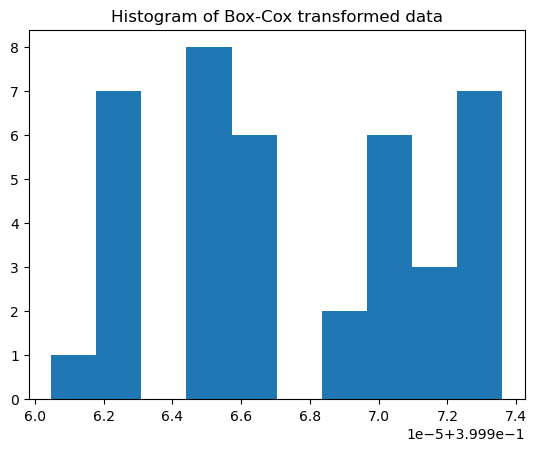

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.004


In [149]:
# Box-Cox transformation
Num_voids_norm = stats.boxcox(df_parts_new['Num_voids'], lmbda = -2.5 )
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

In [148]:
mean_value = df_parts_new['Num_voids'].mean()
std_value =df_parts_new['Num_voids'].std()

Num_voids_norm = (df_parts_new['Num_voids'] - mean_value) / std_value

_, p_value_SW = stats.shapiro(Num_voids_norm)
p_value_SW


0.002022052649408579

Lambda = -3.272


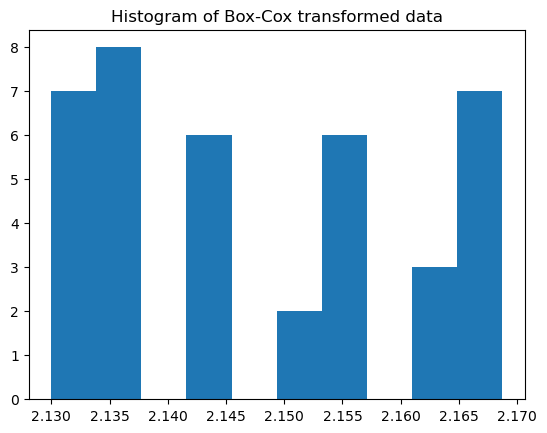

p-value of the Shapiro-Wilk test for "Num_voids_norm": 0.001


In [163]:
df_parts_new['Num_voids'] # indice 23 possibile ouliers num voids = 40

num_void_NO = pd.concat([df_parts_new['Num_voids'][:23], df_parts_new['Num_voids'][24:]])
num_void_NO

Num_voids_norm = stats.boxcox(num_void_NO, lmbda = -1/3)
# If lmbda is None (default), find the value of lmbda that maximizes the log-likelihood function and return it as the second output argument.

print('Lambda = %.3f' % lmbda)

plt.hist(Num_voids_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()

col = 'Num_voids_norm'
_, p_value_SW = stats.shapiro(Num_voids_norm)
print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW))) 





###  Normality in df_void_new

In [170]:
start_index = 4

end_index = len(df_void.columns) - 2

img = 0

for col in df_void.columns[start_index:end_index]:
    dataset = df_void_new.loc[df_void_new['Part_ID'] == img, col].values  # In teoria importa l'ordine perchè dovrei confrontare buco per buco, posso usare comunque t-boostrap? 
# Verify the normality of the data
# Shapiro-Wilk test
    _, p_value_SW = stats.shapiro(dataset)
    print('p-value of the Shapiro-Wilk test for "{}": {:.3f}'.format(col, float(p_value_SW)))

# Analizza immagine per immagine

p-value of the Shapiro-Wilk test for "Area [pixels]": 0.290
p-value of the Shapiro-Wilk test for "Perimeter [pixels]": 0.322
p-value of the Shapiro-Wilk test for "Eccentricity": 0.000
p-value of the Shapiro-Wilk test for "Orientation [radians]": 0.001
p-value of the Shapiro-Wilk test for "Solidity": 0.010
p-value of the Shapiro-Wilk test for "Extent": 0.027
p-value of the Shapiro-Wilk test for "Major Axis Length [pixels]": 0.795
p-value of the Shapiro-Wilk test for "Minor Axis Length [pixels]": 0.090
p-value of the Shapiro-Wilk test for "Equivalent Diameter [pixels]": 0.351
